In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests
import time
from bs4 import BeautifulSoup
import re
from numpy.random import normal
import warnings
from scipy.stats import kurtosis, skew
import math
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('kc_house_data.csv')

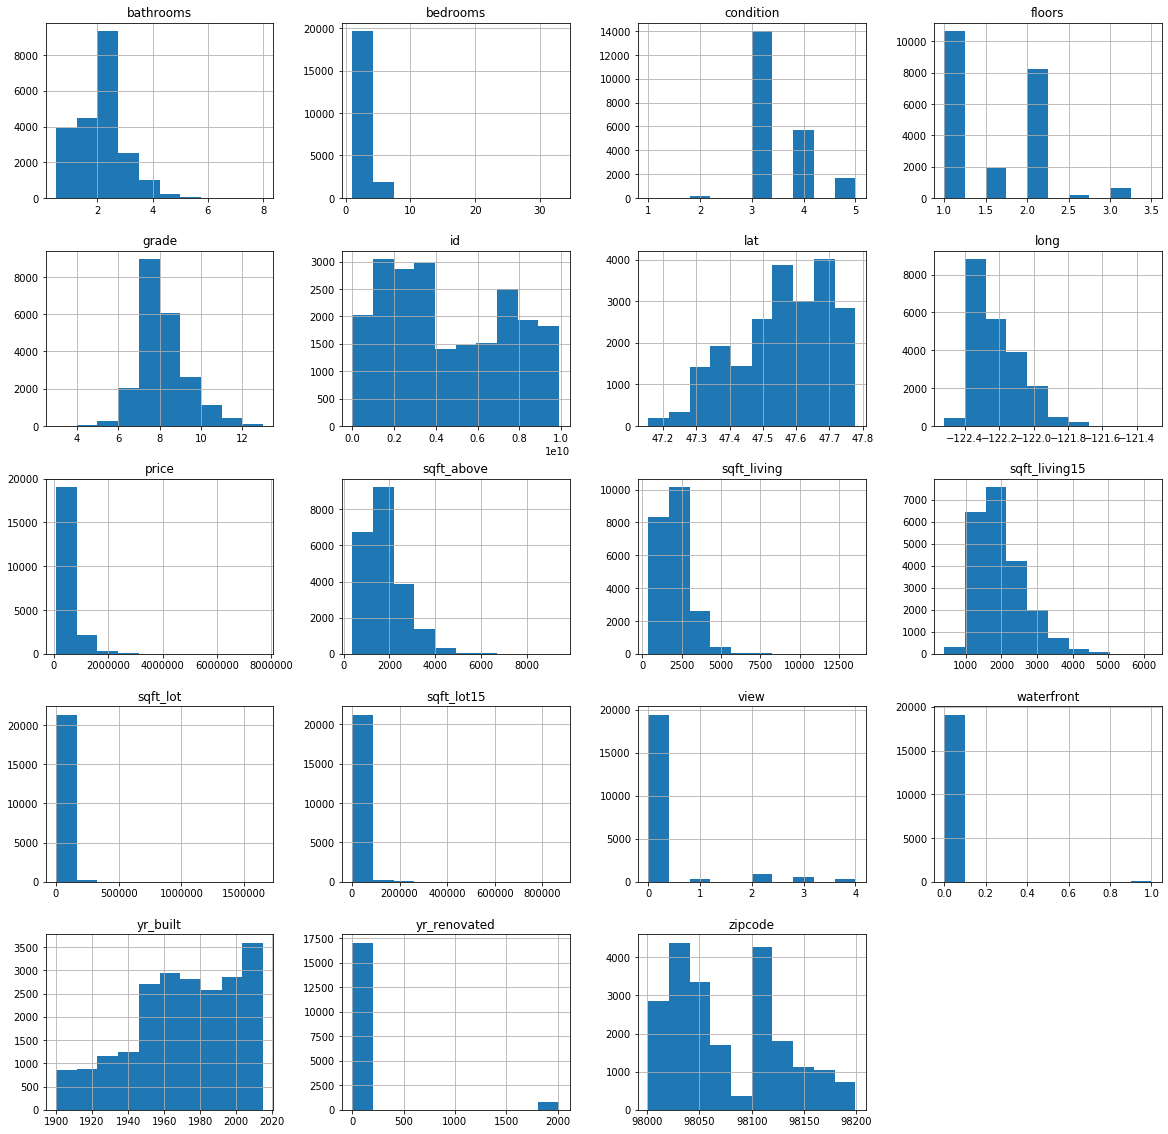

In [3]:
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax);

In [4]:
data_mean, data_std = np.mean(df.price), np.std(df.price)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [5]:
# identify outliers
outliers = [x for x in df.price if x < lower or x > upper]


In [6]:
sorted(outliers)

[1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1660000.0,
 1660000.0,
 1660000.0,
 1660000.0,
 1670000.0,
 1670000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1720000.0,
 1720000.0,
 1720000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 175

In [7]:
df2=df[df.price<1650000]

In [8]:
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [9]:
df3=df2.drop(['id','date','yr_built','yr_renovated','zipcode','lat','long'],axis=1)

In [10]:
df3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,1410,1287


In [11]:
df3.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2334
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
df3=df3.fillna(0)

In [13]:
df3.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21191 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21191 non-null  float64
 1   bedrooms       21191 non-null  int64  
 2   bathrooms      21191 non-null  float64
 3   sqft_living    21191 non-null  int64  
 4   sqft_lot       21191 non-null  int64  
 5   floors         21191 non-null  float64
 6   waterfront     21191 non-null  float64
 7   view           21191 non-null  float64
 8   condition      21191 non-null  int64  
 9   grade          21191 non-null  int64  
 10  sqft_above     21191 non-null  int64  
 11  sqft_basement  21191 non-null  object 
 12  sqft_living15  21191 non-null  int64  
 13  sqft_lot15     21191 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 2.4+ MB


In [15]:
df3.sqft_basement.value_counts()

0.0       12687
?           449
600.0       215
500.0       206
700.0       202
          ...  
2810.0        1
946.0         1
1525.0        1
2196.0        1
274.0         1
Name: sqft_basement, Length: 286, dtype: int64

In [16]:
df4=df3[df3.sqft_basement!='?']

In [17]:
df4.sqft_basement.value_counts()

0.0       12687
600.0       215
500.0       206
700.0       202
800.0       199
          ...  
784.0         1
906.0         1
276.0         1
225.0         1
1548.0        1
Name: sqft_basement, Length: 285, dtype: int64

In [18]:
df5=df4.sqft_basement.astype('float')

In [19]:
df5

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 20742, dtype: float64

In [20]:
df4.drop('sqft_basement',axis=1, inplace=True)

In [21]:
df6=pd.concat([df4,df5], axis=1)

In [22]:
df6

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1340,5650,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1690,7639,400.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,2720,8062,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1360,5000,910.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,1530,1509,0.0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,1830,7200,0.0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,1020,2007,0.0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,1410,1287,0.0


In [23]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20742 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20742 non-null  float64
 1   bedrooms       20742 non-null  int64  
 2   bathrooms      20742 non-null  float64
 3   sqft_living    20742 non-null  int64  
 4   sqft_lot       20742 non-null  int64  
 5   floors         20742 non-null  float64
 6   waterfront     20742 non-null  float64
 7   view           20742 non-null  float64
 8   condition      20742 non-null  int64  
 9   grade          20742 non-null  int64  
 10  sqft_above     20742 non-null  int64  
 11  sqft_living15  20742 non-null  int64  
 12  sqft_lot15     20742 non-null  int64  
 13  sqft_basement  20742 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 2.4 MB


In [24]:
df6.drop('sqft_living', axis=1, inplace=True)

In [25]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20742 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20742 non-null  float64
 1   bedrooms       20742 non-null  int64  
 2   bathrooms      20742 non-null  float64
 3   sqft_lot       20742 non-null  int64  
 4   floors         20742 non-null  float64
 5   waterfront     20742 non-null  float64
 6   view           20742 non-null  float64
 7   condition      20742 non-null  int64  
 8   grade          20742 non-null  int64  
 9   sqft_above     20742 non-null  int64  
 10  sqft_living15  20742 non-null  int64  
 11  sqft_lot15     20742 non-null  int64  
 12  sqft_basement  20742 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.2 MB


In [26]:
df6.corr()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,sqft_basement
price,1.000000,0.311737,0.495456,0.091900,0.277501,0.093790,0.315668,0.034890,0.672121,0.566592,0.595925,0.089219,0.279010
bedrooms,0.311737,1.000000,0.502775,0.030854,0.168092,-0.030493,0.054871,0.022527,0.339533,0.470516,0.379640,0.028748,0.291158
bathrooms,0.495456,0.502775,1.000000,0.079032,0.505750,0.004172,0.134108,-0.136133,0.640829,0.659714,0.549208,0.083371,0.247740
sqft_lot,0.091900,0.030854,0.079032,1.000000,-0.012971,0.022286,0.071031,-0.007703,0.103472,0.176988,0.143792,0.717367,0.011312
floors,0.277501,0.168092,0.505750,-0.012971,1.000000,-0.002168,0.004359,-0.271155,0.457899,0.528825,0.272828,-0.015356,-0.271748
waterfront,0.093790,-0.030493,0.004172,0.022286,-0.002168,1.000000,0.300494,0.012279,0.008632,-0.001437,0.025450,0.030024,0.030890
view,0.315668,0.054871,0.134108,0.071031,0.004359,0.300494,1.000000,0.037894,0.190337,0.106023,0.232641,0.070647,0.238321
condition,0.034890,0.022527,-0.136133,-0.007703,-0.271155,0.012279,0.037894,1.000000,-0.162258,-0.172666,-0.107777,-0.003763,0.171766
grade,0.672121,0.339533,0.640829,0.103472,0.457899,0.008632,0.190337,-0.162258,1.000000,0.733772,0.696745,0.115673,0.119724
sqft_above,0.566592,0.470516,0.659714,0.176988,0.528825,-0.001437,0.106023,-0.172666,0.733772,1.000000,0.726049,0.193409,-0.118133


In [27]:
abs(df6.corr()>0.75)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,sqft_basement
price,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False
sqft_above,False,False,False,False,False,False,False,False,False,True,False,False,False


In [28]:
outcome='price'
new_x_cols=[col for col in df6.columns]
new_x_cols.remove('price')
predictors='+'.join(new_x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=df6).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     2267.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:03:10   Log-Likelihood:            -2.7931e+05
No. Observations:               20742   AIC:                         5.587e+05
Df Residuals:                   20729   BIC:                         5.588e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.044e+05   1.34e+04    -45.230      0.000   -6.31e+05   -5.78e+05
bedrooms      -1.365e+04   1661.619     -8.216      0.000   -1.69e+04   -1.04e+04
bathrooms     -2.046e+04   2679.422     -7.634      0.000   -2.57e+04   -1.52e+04
sqft_lot          0.0983      0.042      2.337      0.019       0.016       0.181
floors         2.821e+04   3060.806      9.216      0.000    2.22e+04    3.42e+04
waterfront     1.786e+05   2.06e+04      8.661      0.000    1.38e+05    2.19e+05
view           4.581e+04   1868.015     24.522      0.000    4.21e+04    4.95e+04
condition        4.8e+04   1921.203     24.983      0.000    4.42e+04    5.18e+04
grade          9.255e+04   1817.551     50.921      0.000     8.9e+04    9.61e+04
sqft_above       89.7427      3.336     26.897      0.000      83.203      96.282
sqft_living15    44.0651      3.012     14.628      0.000      38.161      49.970
sqft_lot15       -0.4331      0.063     -6.822      0.000      -0.557      -0.309
sqft_basement   145.6101      3.861     37.715      0.000     138.043     153.178
==============================================================================
Omnibus:                     3294.559   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7930.390
Skew:                           0.905   Prob(JB):                         0.00
Kurtosis:                       5.429   Cond. No.                     8.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression

#make X,y to put in the train-test split
y=df6.price
X=df6.drop('price', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [39]:
print(len(X_train), len(X_test))

16593 4149


In [40]:
linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)



In [41]:
train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

Train Mean Squared Error 29157020032.75286
Test Mean Squared Error 28960895189.836285
Root Train Mean Squared Error 170754.26797814708
Root Test Mean Squared Error 170179.0092515416


In [43]:
bins=[0.5,2.50,7.75]
bins_bath=pd.cut(df6.bathrooms, bins)
bins_bath=bins_bath.cat.as_ordered()
bins_bath.head()

0     (0.5, 2.5]
1     (0.5, 2.5]
2     (0.5, 2.5]
3    (2.5, 7.75]
4     (0.5, 2.5]
Name: bathrooms, dtype: category
Categories (2, interval[float64]): [(0.5, 2.5] < (2.5, 7.75]]

In [46]:
df6.bathrooms=bins_bath
df6.bathrooms=df6.bathrooms.cat.codes
bath_dummies=pd.get_dummies(bins_bath, prefix='bath')
df7=pd.concat([df6,bath_dummies], axis=1)

In [47]:
bins=[1.00,3.00,33]
bins_bedrooms=pd.cut(df6['bedrooms'], bins)
bins_bedrooms=bins_bedrooms.cat.as_ordered()
bins_bedrooms.head()

0     (1.0, 3.0]
1     (1.0, 3.0]
2     (1.0, 3.0]
3    (3.0, 33.0]
4     (1.0, 3.0]
Name: bedrooms, dtype: category
Categories (2, interval[float64]): [(1.0, 3.0] < (3.0, 33.0]]

In [48]:
df6.bedrooms=bins_bedrooms
df6.bedrooms=df6.bedrooms.cat.codes
bedr_dummies=pd.get_dummies(bins_bedrooms, prefix='bedr')
df8=pd.concat([df7,bedr_dummies], axis=1)

In [49]:
df8.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,sqft_basement,"bath_(0.5, 2.5]","bath_(2.5, 7.75]","bedr_(1.0, 3.0]","bedr_(3.0, 33.0]"
0,221900.0,3,0,5650,1.0,0.0,0.0,3,7,1180,1340,5650,0.0,1,0,1,0
1,538000.0,3,0,7242,2.0,0.0,0.0,3,7,2170,1690,7639,400.0,1,0,1,0
2,180000.0,2,0,10000,1.0,0.0,0.0,3,6,770,2720,8062,0.0,1,0,1,0
3,604000.0,4,1,5000,1.0,0.0,0.0,5,7,1050,1360,5000,910.0,0,1,0,1
4,510000.0,3,0,8080,1.0,0.0,0.0,3,8,1680,1800,7503,0.0,1,0,1,0


In [53]:
df8.columns=df8.columns.map(lambda x: x.replace('.','_').replace(',','_').replace('[','').replace(']','').replace('(','').replace(')','').replace(' ',''))

In [54]:
df8.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_living15',
       'sqft_lot15', 'sqft_basement', 'bath_0_5_2_5', 'bath_2_5_7_75',
       'bedr_1_0_3_0', 'bedr_3_0_33_0'],
      dtype='object')

In [59]:

df8.drop(['bathrooms','bedrooms'], axis=1, inplace=True)

In [60]:
outcome='price'
new_x_cols=[col for col in df8.columns]
new_x_cols.remove('price')
predictors='+'.join(new_x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=df8).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     2277.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:22:14   Log-Likelihood:            -2.7929e+05
No. Observations:               20742   AIC:                         5.586e+05
Df Residuals:                   20729   BIC:                         5.587e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.787e+05   1.38e+04    -42.009      0.000   -6.06e+05   -5.52e+05
sqft_lot          0.0963      0.042      2.292      0.022       0.014       0.179
floors         1.617e+04   2859.613      5.654      0.000    1.06e+04    2.18e+04
waterfront     1.832e+05   2.06e+04      8.898      0.000    1.43e+05    2.24e+05
view           4.617e+04   1864.500     24.764      0.000    4.25e+04    4.98e+04
condition      4.816e+04   1915.616     25.138      0.000    4.44e+04    5.19e+04
grade          9.091e+04   1797.928     50.565      0.000    8.74e+04    9.44e+04
sqft_above       63.4061      3.179     19.943      0.000      57.174      69.638
sqft_living15    48.0168      3.014     15.933      0.000      42.110      53.924
sqft_lot15       -0.3898      0.063     -6.146      0.000      -0.514      -0.265
sqft_basement   109.2855      3.577     30.551      0.000     102.274     116.297
bath_0_5_2_5  -5.246e+04   3773.838    -13.900      0.000   -5.99e+04   -4.51e+04
bedr_1_0_3_0   1.248e+04   2875.033      4.341      0.000    6844.330    1.81e+04
==============================================================================
Omnibus:                     3218.056   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7472.874
Skew:                           0.898   Prob(JB):                         0.00
Kurtosis:                       5.328   Cond. No.                     8.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
cates=['floors','waterfront','view','condition','grade']

In [75]:
flo_dummies=pd.get_dummies(df8['floors'], prefix='flo', drop_first=True)


view_dummies=pd.get_dummies(df8['view'], prefix='vw', drop_first=True)
con_dummies=pd.get_dummies(df8['condition'], prefix='con', drop_first=True)


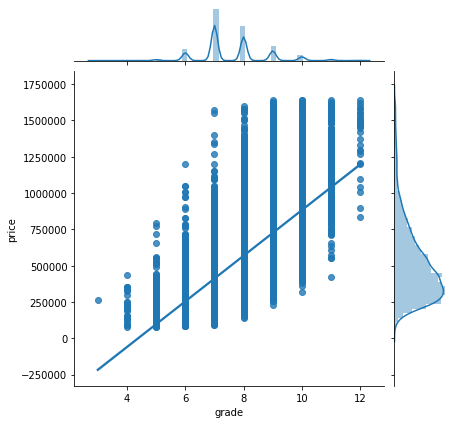

In [91]:
#decide to make grade dummy or binning
sns.jointplot(x=df8.grade, y= df8.price, data=df8, kind='reg')

In [84]:
df11=df8.drop(['floors','view','condition','grade'], axis=1)

In [93]:
bins=[3,7,12]
bins_gra=pd.cut(df6.grade, bins)
bins_gra=bins_gra.cat.as_ordered()
bins_gra.head()

0     (3, 7]
1     (3, 7]
2     (3, 7]
3     (3, 7]
4    (7, 12]
Name: grade, dtype: category
Categories (2, interval[int64]): [(3, 7] < (7, 12]]

In [95]:
df6.grade=bins_gra
df6.grade=df6.grade.cat.codes
grade_dummies=pd.get_dummies(bins_gra, prefix='gra')


,"gra_(3, 7]","gra_(7, 12]"
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
21592,0,1
21593,0,1
21594,1,0
21595,0,1


In [101]:
df12=pd.concat([df11,grade_dummies], axis=1)

In [102]:
df12

,price,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sqft_basement,bath_0_5_2_5,bedr_1_0_3_0,"gra_(3, 7]","gra_(7, 12]"
0,221900.0,5650,0.0,1180,1340,5650,0.0,1,1,1,0
1,538000.0,7242,0.0,2170,1690,7639,400.0,1,1,1,0
2,180000.0,10000,0.0,770,2720,8062,0.0,1,1,1,0
3,604000.0,5000,0.0,1050,1360,5000,910.0,0,0,1,0
4,510000.0,8080,0.0,1680,1800,7503,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131,0.0,1530,1530,1509,0.0,1,1,0,1
21593,400000.0,5813,0.0,2310,1830,7200,0.0,1,0,0,1
21594,402101.0,1350,0.0,1020,1020,2007,0.0,1,1,1,0
21595,400000.0,2388,0.0,1600,1410,1287,0.0,1,1,0,1


In [103]:
df12.columns=df12.columns.map(lambda x: x.replace('.','_').replace(',','_').replace('[','').replace(']','').replace('(','').replace(')','').replace(' ',''))

In [105]:
df13=df12.drop('gra_3_7', axis=1)

In [106]:
df13

,price,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sqft_basement,bath_0_5_2_5,bedr_1_0_3_0,gra_7_12
0,221900.0,5650,0.0,1180,1340,5650,0.0,1,1,0
1,538000.0,7242,0.0,2170,1690,7639,400.0,1,1,0
2,180000.0,10000,0.0,770,2720,8062,0.0,1,1,0
3,604000.0,5000,0.0,1050,1360,5000,910.0,0,0,0
4,510000.0,8080,0.0,1680,1800,7503,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131,0.0,1530,1530,1509,0.0,1,1,1
21593,400000.0,5813,0.0,2310,1830,7200,0.0,1,0,1
21594,402101.0,1350,0.0,1020,1020,2007,0.0,1,1,0
21595,400000.0,2388,0.0,1600,1410,1287,0.0,1,1,1


In [110]:
df14=pd.concat([df13,flo_dummies,view_dummies,con_dummies], axis=1)

In [111]:
df14


,price,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sqft_basement,bath_0_5_2_5,bedr_1_0_3_0,gra_7_12,...,flo_3.0,flo_3.5,vw_1.0,vw_2.0,vw_3.0,vw_4.0,con_2,con_3,con_4,con_5
0,221900.0,5650,0.0,1180,1340,5650,0.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,7242,0.0,2170,1690,7639,400.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,10000,0.0,770,2720,8062,0.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,5000,0.0,1050,1360,5000,910.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,8080,0.0,1680,1800,7503,0.0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131,0.0,1530,1530,1509,0.0,1,1,1,...,1,0,0,0,0,0,0,1,0,0
21593,400000.0,5813,0.0,2310,1830,7200,0.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
21594,402101.0,1350,0.0,1020,1020,2007,0.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
21595,400000.0,2388,0.0,1600,1410,1287,0.0,1,1,1,...,0,0,0,0,0,0,0,1,0,0


In [113]:
df14.columns=df14.columns.map(lambda x: x.replace('.','_').replace(',','_').replace('[','').replace(']','').replace('(','').replace(')','').replace(' ',''))

In [114]:
outcome='price'
new_x_cols=[col for col in df14.columns]
new_x_cols.remove('price')
predictors='+'.join(new_x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=df14).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     1123.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:54:05   Log-Likelihood:            -2.7987e+05
No. Observations:               20742   AIC:                         5.598e+05
Df Residuals:                   20719   BIC:                         5.600e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.233e+04   3.39e+04      1.250      0.211   -2.41e+04    1.09e+05
sqft_lot          0.0577      0.043      1.334      0.182      -0.027       0.142
waterfront     1.443e+05   2.29e+04      6.299      0.000    9.94e+04    1.89e+05
sqft_above      117.5893      3.132     37.542      0.000     111.450     123.729
sqft_living15    81.4117      3.058     26.621      0.000      75.418      87.406
sqft_lot15       -0.4582      0.065     -7.021      0.000      -0.586      -0.330
sqft_basement   135.9091      3.623     37.509      0.000     128.807     143.011
bath_0_5_2_5  -5.819e+04   3886.793    -14.972      0.000   -6.58e+04   -5.06e+04
bedr_1_0_3_0   3.161e+04   2951.920     10.708      0.000    2.58e+04    3.74e+04
gra_7_12        9.13e+04   3284.398     27.797      0.000    8.49e+04    9.77e+04
flo_1_5        8.878e+04   4559.767     19.470      0.000    7.98e+04    9.77e+04
flo_2_0       -1970.4921   3654.875     -0.539      0.590   -9134.334    5193.350
flo_2_5        1.322e+05   1.56e+04      8.448      0.000    1.01e+05    1.63e+05
flo_3_0         8.98e+04   8043.401     11.165      0.000     7.4e+04    1.06e+05
flo_3_5        4.706e+04   7.17e+04      0.656      0.512   -9.35e+04    1.88e+05
vw_1_0         1.017e+05   1.02e+04      9.932      0.000    8.17e+04    1.22e+05
vw_2_0         7.853e+04   6194.525     12.677      0.000    6.64e+04    9.07e+04
vw_3_0          1.33e+05   8678.880     15.327      0.000    1.16e+05     1.5e+05
vw_4_0         2.162e+05   1.39e+04     15.512      0.000    1.89e+05    2.43e+05
con_2         -3417.6503   3.59e+04     -0.095      0.924   -7.37e+04    6.69e+04
con_3          1.732e+04   3.32e+04      0.521      0.602   -4.78e+04    8.25e+04
con_4          4.768e+04   3.33e+04      1.433      0.152   -1.75e+04    1.13e+05
con_5          1.075e+05   3.35e+04      3.212      0.001    4.19e+04    1.73e+05
==============================================================================
Omnibus:                     3158.673   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7344.990
Skew:                           0.883   Prob(JB):                         0.00
Kurtosis:                       5.320   Cond. No.                     3.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
df15=df14.drop(['flo_2_0','flo_3_5','con_2','con_3'],axis=1)

In [122]:
outcome='price'
new_x_cols=[col for col in df15.columns]
new_x_cols.remove('price')
predictors='+'.join(new_x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=df15).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     1373.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:58:24   Log-Likelihood:            -2.7987e+05
No. Observations:               20742   AIC:                         5.598e+05
Df Residuals:                   20723   BIC:                         5.599e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.872e+04   7353.604      7.985      0.000    4.43e+04    7.31e+04
sqft_lot          0.0558      0.043      1.292      0.196      -0.029       0.140
waterfront     1.442e+05   2.29e+04      6.296      0.000    9.93e+04    1.89e+05
sqft_above      117.2113      2.922     40.116      0.000     111.484     122.938
sqft_living15    81.4656      3.044     26.761      0.000      75.499      87.432
sqft_lot15       -0.4563      0.065     -7.000      0.000      -0.584      -0.329
sqft_basement   136.4534      3.535     38.597      0.000     129.524     143.383
bath_0_5_2_5  -5.814e+04   3880.329    -14.982      0.000   -6.57e+04   -5.05e+04
bedr_1_0_3_0   3.178e+04   2949.953     10.772      0.000     2.6e+04    3.76e+04
gra_7_12       9.117e+04   3202.705     28.467      0.000    8.49e+04    9.74e+04
flo_1_5        8.944e+04   4378.183     20.428      0.000    8.09e+04     9.8e+04
flo_2_5        1.336e+05   1.54e+04      8.674      0.000    1.03e+05    1.64e+05
flo_3_0        9.115e+04   7721.159     11.805      0.000     7.6e+04    1.06e+05
vw_1_0         1.019e+05   1.02e+04      9.946      0.000    8.18e+04    1.22e+05
vw_2_0         7.867e+04   6193.063     12.703      0.000    6.65e+04    9.08e+04
vw_3_0          1.33e+05   8678.484     15.326      0.000    1.16e+05     1.5e+05
vw_4_0          2.16e+05   1.39e+04     15.507      0.000    1.89e+05    2.43e+05
con_4          3.103e+04   2903.916     10.687      0.000    2.53e+04    3.67e+04
con_5          9.085e+04   4751.779     19.119      0.000    8.15e+04       1e+05
==============================================================================
Omnibus:                     3150.722   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7310.273
Skew:                           0.882   Prob(JB):                         0.00
Kurtosis:                       5.313   Cond. No.                     9.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
y=df15.price
X=df15.drop('price', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

Train Mean Squared Error 30842479527.956833
Test Mean Squared Error 30199972169.253925
Root Train Mean Squared Error 175620.27083442512
Root Test Mean Squared Error 173781.3918958354


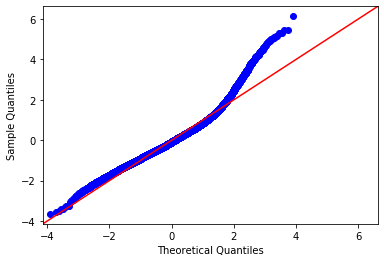

In [124]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [127]:
df15.to_csv('dummies_data.csv')

In [133]:
df15.price.value_counts()

350000.0    168
450000.0    167
550000.0    155
500000.0    149
425000.0    146
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3452, dtype: int64

In [135]:
for i in range(90, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, df15['price'].quantile(q=q)))

0.9 percentile: 845000.0
0.91 percentile: 866593.0000000005
0.92 percentile: 896000.0
0.93 percentile: 925000.0
0.94 percentile: 962000.0
0.95 percentile: 1000000.0
0.96 percentile: 1080000.0
0.97 percentile: 1180000.0
0.98 percentile: 1280000.0
0.99 percentile: 1400000.0


In [136]:
df16=df15[df15.price<845000]

In [137]:
df16

,price,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sqft_basement,bath_0_5_2_5,bedr_1_0_3_0,gra_7_12,flo_1_5,flo_2_5,flo_3_0,vw_1_0,vw_2_0,vw_3_0,vw_4_0,con_4,con_5
0,221900.0,5650,0.0,1180,1340,5650,0.0,1,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,7242,0.0,2170,1690,7639,400.0,1,1,0,0,0,0,0,0,0,0,0,0
2,180000.0,10000,0.0,770,2720,8062,0.0,1,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,5000,0.0,1050,1360,5000,910.0,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,8080,0.0,1680,1800,7503,0.0,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131,0.0,1530,1530,1509,0.0,1,1,1,0,0,1,0,0,0,0,0,0
21593,400000.0,5813,0.0,2310,1830,7200,0.0,1,0,1,0,0,0,0,0,0,0,0,0
21594,402101.0,1350,0.0,1020,1020,2007,0.0,1,1,0,0,0,0,0,0,0,0,0,0
21595,400000.0,2388,0.0,1600,1410,1287,0.0,1,1,1,0,0,0,0,0,0,0,0,0


In [138]:
outcome='price'
new_x_cols=[col for col in df16.columns]
new_x_cols.remove('price')
predictors='+'.join(new_x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=df16).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     726.6
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:09:11   Log-Likelihood:            -2.4613e+05
No. Observations:               18655   AIC:                         4.923e+05
Df Residuals:                   18636   BIC:                         4.925e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.429e+05   6118.179     23.362      0.000    1.31e+05    1.55e+05
sqft_lot          0.1115      0.036      3.066      0.002       0.040       0.183
waterfront     7.139e+04   2.44e+04      2.927      0.003    2.36e+04    1.19e+05
sqft_above       62.9868      2.510     25.093      0.000      58.067      67.907
sqft_living15    66.5160      2.643     25.168      0.000      61.336      71.696
sqft_lot15       -0.2764      0.055     -5.042      0.000      -0.384      -0.169
sqft_basement    91.0299      2.956     30.796      0.000      85.236      96.824
bath_0_5_2_5  -1.878e+04   3227.218     -5.820      0.000   -2.51e+04   -1.25e+04
bedr_1_0_3_0    1.77e+04   2327.021      7.605      0.000    1.31e+04    2.23e+04
gra_7_12       8.249e+04   2509.548     32.871      0.000    7.76e+04    8.74e+04
flo_1_5        7.849e+04   3444.267     22.789      0.000    7.17e+04    8.52e+04
flo_2_5        8.313e+04   1.38e+04      6.020      0.000    5.61e+04     1.1e+05
flo_3_0        6.836e+04   6096.306     11.213      0.000    5.64e+04    8.03e+04
vw_1_0         6.253e+04   8804.101      7.102      0.000    4.53e+04    7.98e+04
vw_2_0          4.44e+04   5323.095      8.341      0.000     3.4e+04    5.48e+04
vw_3_0         4.221e+04   8172.602      5.164      0.000    2.62e+04    5.82e+04
vw_4_0           9.8e+04   1.64e+04      5.986      0.000    6.59e+04     1.3e+05
con_4          1.847e+04   2261.046      8.170      0.000     1.4e+04    2.29e+04
con_5          6.135e+04   3803.039     16.133      0.000    5.39e+04    6.88e+04
==============================================================================
Omnibus:                      355.141   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.176
Skew:                           0.310   Prob(JB):                     5.53e-77
Kurtosis:                       2.740   Cond. No.                     1.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
y=df16.price
X=df16.drop('price', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

Train Mean Squared Error 16760731390.143318
Test Mean Squared Error 17441107013.867626
Root Train Mean Squared Error 129463.24339419014
Root Test Mean Squared Error 132064.78339764779


In [140]:
transform=df15

In [141]:
transform

,price,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sqft_basement,bath_0_5_2_5,bedr_1_0_3_0,gra_7_12,flo_1_5,flo_2_5,flo_3_0,vw_1_0,vw_2_0,vw_3_0,vw_4_0,con_4,con_5
0,221900.0,5650,0.0,1180,1340,5650,0.0,1,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,7242,0.0,2170,1690,7639,400.0,1,1,0,0,0,0,0,0,0,0,0,0
2,180000.0,10000,0.0,770,2720,8062,0.0,1,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,5000,0.0,1050,1360,5000,910.0,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,8080,0.0,1680,1800,7503,0.0,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131,0.0,1530,1530,1509,0.0,1,1,1,0,0,1,0,0,0,0,0,0
21593,400000.0,5813,0.0,2310,1830,7200,0.0,1,0,1,0,0,0,0,0,0,0,0,0
21594,402101.0,1350,0.0,1020,1020,2007,0.0,1,1,0,0,0,0,0,0,0,0,0,0
21595,400000.0,2388,0.0,1600,1410,1287,0.0,1,1,1,0,0,0,0,0,0,0,0,0


In [142]:
continous=['sqft_lot','sqft_above','sqft_living15','sqft_lot15','sqft_basement']

In [156]:
def normalize(feature):
    return (feature - np.mean(feature)) / np.std(feature)


In [157]:
normalize(transform[continous])

,sqft_lot,sqft_above,sqft_living15,sqft_lot15,sqft_basement
0,-0.226600,-0.740110,-0.947556,-0.257135,-0.660931
1,-0.187397,0.541461,-0.413278,-0.183713,0.279897
2,-0.119481,-1.270861,1.159028,-0.168099,-0.660931
3,-0.242606,-0.908397,-0.917026,-0.281129,1.479452
4,-0.166761,-0.092852,-0.245361,-0.188734,-0.660931
...,...,...,...,...,...
21592,-0.337881,-0.287029,-0.657519,-0.409996,-0.660931
21593,-0.222586,0.722693,-0.199566,-0.199919,-0.660931
21594,-0.332488,-0.947232,-1.436040,-0.391613,-0.660931
21595,-0.306927,-0.196413,-0.840701,-0.418191,-0.660931


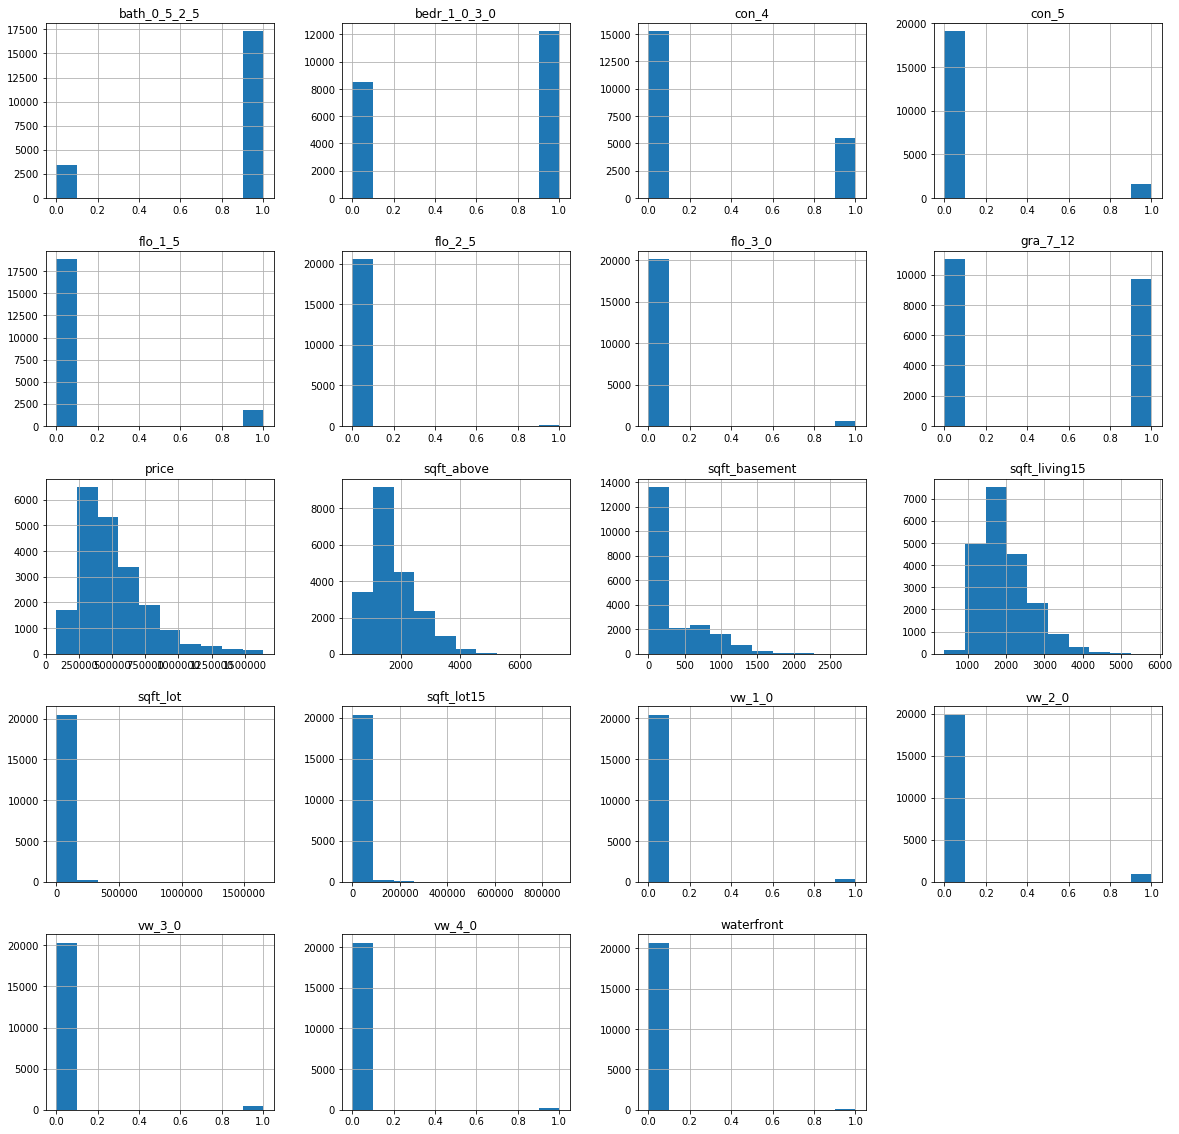

In [158]:
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
transform.hist(ax = ax);

In [177]:
continous=['sqft_lot','sqft_above','sqft_living15','sqft_lot15','sqft_basement']

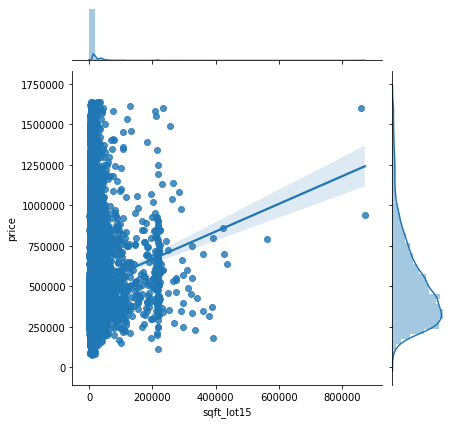

In [159]:
sns.jointplot(x=df15.sqft_lot15, y= df15.price, data=df15, kind='reg')

In [170]:
#log_transform
transform.sqft_above=np.log(transform.sqft_above)


In [171]:
transform[continous]=normalize(transform[continous])

In [172]:

transform

,price,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sqft_basement,bath_0_5_2_5,bedr_1_0_3_0,gra_7_12,flo_1_5,flo_2_5,flo_3_0,vw_1_0,vw_2_0,vw_3_0,vw_4_0,con_4,con_5
0,221900.0,-0.226600,0.0,-0.713486,-0.947556,-0.257135,-0.660931,1,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,-0.187397,0.0,0.758170,-0.413278,-0.183713,0.279897,1,1,0,0,0,0,0,0,0,0,0,0
2,180000.0,-0.119481,0.0,-1.928561,1.159028,-0.168099,-0.660931,1,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,-0.242606,0.0,-1.028674,-0.917026,-0.281129,1.479452,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.166761,0.0,0.172571,-0.245361,-0.188734,-0.660931,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-0.337881,0.0,-0.052706,-0.657519,-0.409996,-0.660931,1,1,1,0,0,1,0,0,0,0,0,0
21593,400000.0,-0.222586,0.0,0.894797,-0.199566,-0.199919,-0.660931,1,0,1,0,0,0,0,0,0,0,0,0
21594,402101.0,-0.332488,0.0,-1.108835,-1.436040,-0.391613,-0.660931,1,1,0,0,0,0,0,0,0,0,0,0
21595,400000.0,-0.306927,0.0,0.055842,-0.840701,-0.418191,-0.660931,1,1,1,0,0,0,0,0,0,0,0,0


In [173]:
outcome='price'
new_x_cols=[col for col in transform.columns]
new_x_cols.remove('price')
predictors='+'.join(new_x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=transform).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     1261.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:35:58   Log-Likelihood:            -2.8034e+05
No. Observations:               20742   AIC:                         5.607e+05
Df Residuals:                   20723   BIC:                         5.609e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.871e+05   4185.464    116.373      0.000    4.79e+05    4.95e+05
sqft_lot       4685.5483   1791.701      2.615      0.009    1173.674    8197.423
waterfront       1.4e+05   2.34e+04      5.973      0.000    9.41e+04    1.86e+05
sqft_above     5.208e+04   2095.670     24.850      0.000     4.8e+04    5.62e+04
sqft_living15  7.573e+04   1920.927     39.425      0.000     7.2e+04    7.95e+04
sqft_lot15    -1.024e+04   1804.893     -5.675      0.000   -1.38e+04   -6705.821
sqft_basement  4.411e+04   1473.164     29.942      0.000    4.12e+04     4.7e+04
bath_0_5_2_5  -8.479e+04   3871.063    -21.904      0.000   -9.24e+04   -7.72e+04
bedr_1_0_3_0   1.583e+04   2988.233      5.298      0.000    9974.378    2.17e+04
gra_7_12        9.96e+04   3341.803     29.804      0.000    9.31e+04    1.06e+05
flo_1_5        8.505e+04   4497.256     18.912      0.000    7.62e+04    9.39e+04
flo_2_5        1.506e+05   1.57e+04      9.564      0.000     1.2e+05    1.81e+05
flo_3_0        8.671e+04   7898.328     10.979      0.000    7.12e+04    1.02e+05
vw_1_0         9.626e+04   1.05e+04      9.189      0.000    7.57e+04    1.17e+05
vw_2_0         7.691e+04   6335.591     12.139      0.000    6.45e+04    8.93e+04
vw_3_0         1.297e+05   8877.271     14.608      0.000    1.12e+05    1.47e+05
vw_4_0         2.145e+05   1.43e+04     15.053      0.000    1.87e+05    2.42e+05
con_4          2.633e+04   2966.601      8.876      0.000    2.05e+04    3.21e+04
con_5          8.797e+04   4860.307     18.099      0.000    7.84e+04    9.75e+04
==============================================================================
Omnibus:                     3305.744   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7693.382
Skew:                           0.919   Prob(JB):                         0.00
Kurtosis:                       5.350   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
y=df16.price
X=df16.drop('price', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

Train Mean Squared Error 16760731390.143318
Test Mean Squared Error 17441107013.867626
Root Train Mean Squared Error 129463.24339419014
Root Test Mean Squared Error 132064.78339764779


In [175]:
trans_2nd=df16

In [176]:
trans_2nd

,price,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sqft_basement,bath_0_5_2_5,bedr_1_0_3_0,gra_7_12,flo_1_5,flo_2_5,flo_3_0,vw_1_0,vw_2_0,vw_3_0,vw_4_0,con_4,con_5
0,221900.0,5650,0.0,1180,1340,5650,0.0,1,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,7242,0.0,2170,1690,7639,400.0,1,1,0,0,0,0,0,0,0,0,0,0
2,180000.0,10000,0.0,770,2720,8062,0.0,1,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,5000,0.0,1050,1360,5000,910.0,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,8080,0.0,1680,1800,7503,0.0,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131,0.0,1530,1530,1509,0.0,1,1,1,0,0,1,0,0,0,0,0,0
21593,400000.0,5813,0.0,2310,1830,7200,0.0,1,0,1,0,0,0,0,0,0,0,0,0
21594,402101.0,1350,0.0,1020,1020,2007,0.0,1,1,0,0,0,0,0,0,0,0,0,0
21595,400000.0,2388,0.0,1600,1410,1287,0.0,1,1,1,0,0,0,0,0,0,0,0,0


In [179]:
trans_2nd[continous]=np.log(trans_2nd[continous])

In [180]:
trans_2nd

,price,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sqft_basement,bath_0_5_2_5,bedr_1_0_3_0,gra_7_12,flo_1_5,flo_2_5,flo_3_0,vw_1_0,vw_2_0,vw_3_0,vw_4_0,con_4,con_5
0,221900.0,8.639411,0.0,7.073270,7.200425,8.639411,-inf,1,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,8.887653,0.0,7.682482,7.432484,8.941022,5.991465,1,1,0,0,0,0,0,0,0,0,0,0
2,180000.0,9.210340,0.0,6.646391,7.908387,8.994917,-inf,1,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,8.517193,0.0,6.956545,7.215240,8.517193,6.813445,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,8.997147,0.0,7.426549,7.495542,8.923058,-inf,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,7.030857,0.0,7.333023,7.333023,7.319202,-inf,1,1,1,0,0,1,0,0,0,0,0,0
21593,400000.0,8.667852,0.0,7.745003,7.512071,8.881836,-inf,1,0,1,0,0,0,0,0,0,0,0,0
21594,402101.0,7.207860,0.0,6.927558,6.927558,7.604396,-inf,1,1,0,0,0,0,0,0,0,0,0,0
21595,400000.0,7.778211,0.0,7.377759,7.251345,7.160069,-inf,1,1,1,0,0,0,0,0,0,0,0,0


In [182]:
trans_2nd[continous]=normalize(trans_2nd[continous])

In [183]:
trans_2nd

,price,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,sqft_basement,bath_0_5_2_5,bedr_1_0_3_0,gra_7_12,flo_1_5,flo_2_5,flo_3_0,vw_1_0,vw_2_0,vw_3_0,vw_4_0,con_4,con_5
0,221900.0,-0.341422,0.0,-0.657462,-0.977056,-0.351351,NaN,1,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,-0.060918,0.0,0.916686,-0.188873,0.025869,NaN,1,1,0,0,0,0,0,0,0,0,0,0
2,180000.0,0.303708,0.0,-1.760478,1.427521,0.093275,NaN,1,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,-0.479524,0.0,-0.959066,-0.926736,-0.504207,NaN,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,0.062807,0.0,0.255379,0.025303,0.003402,NaN,1,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,-2.159030,0.0,0.013716,-0.526689,-2.002515,NaN,1,1,1,0,0,1,0,0,0,0,0,0
21593,400000.0,-0.309285,0.0,1.078233,0.081444,-0.048153,NaN,1,0,1,0,0,0,0,0,0,0,0,0
21594,402101.0,-1.959024,0.0,-1.033968,-1.903842,-1.645827,NaN,1,1,0,0,0,0,0,0,0,0,0,0
21595,400000.0,-1.314547,0.0,0.129309,-0.804107,-2.201540,NaN,1,1,1,0,0,0,0,0,0,0,0,0


In [184]:
trans_2nd.drop('sqft_basement', axis=1, inplace=True)

In [185]:
trans_2nd.head()

,price,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,bath_0_5_2_5,bedr_1_0_3_0,gra_7_12,flo_1_5,flo_2_5,flo_3_0,vw_1_0,vw_2_0,vw_3_0,vw_4_0,con_4,con_5
0,221900.0,-0.341422,0.0,-0.657462,-0.977056,-0.351351,1,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,-0.060918,0.0,0.916686,-0.188873,0.025869,1,1,0,0,0,0,0,0,0,0,0,0
2,180000.0,0.303708,0.0,-1.760478,1.427521,0.093275,1,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,-0.479524,0.0,-0.959066,-0.926736,-0.504207,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,0.062807,0.0,0.255379,0.025303,0.003402,1,1,1,0,0,0,0,0,0,0,0,0


In [186]:
outcome='price'
new_x_cols=[col for col in trans_2nd.columns]
new_x_cols.remove('price')
predictors='+'.join(new_x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=trans_2nd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     689.3
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:47:18   Log-Likelihood:            -2.4654e+05
No. Observations:               18655   AIC:                         4.931e+05
Df Residuals:                   18637   BIC:                         4.933e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.236e+05   3425.665    123.650      0.000    4.17e+05     4.3e+05
sqft_lot       3557.5500   2520.739      1.411      0.158   -1383.329    8498.429
waterfront     7.545e+04    2.5e+04      3.024      0.002    2.65e+04    1.24e+05
sqft_above     1.876e+04   1488.388     12.606      0.000    1.58e+04    2.17e+04
sqft_living15  5.344e+04   1447.596     36.914      0.000    5.06e+04    5.63e+04
sqft_lot15     -2.11e+04   2507.546     -8.415      0.000    -2.6e+04   -1.62e+04
bath_0_5_2_5  -4.594e+04   3181.294    -14.442      0.000   -5.22e+04   -3.97e+04
bedr_1_0_3_0  -4164.7035   2262.246     -1.841      0.066   -8598.911     269.504
gra_7_12       8.886e+04   2584.648     34.379      0.000    8.38e+04    9.39e+04
flo_1_5        7.016e+04   3533.080     19.859      0.000    6.32e+04    7.71e+04
flo_2_5        6.704e+04   1.41e+04      4.744      0.000    3.93e+04    9.47e+04
flo_3_0        2.648e+04   6443.125      4.111      0.000    1.39e+04    3.91e+04
vw_1_0         7.799e+04   8980.870      8.684      0.000    6.04e+04    9.56e+04
vw_2_0         5.873e+04   5421.916     10.832      0.000    4.81e+04    6.94e+04
vw_3_0         6.715e+04   8314.164      8.077      0.000    5.09e+04    8.35e+04
vw_4_0         1.213e+05   1.67e+04      7.257      0.000    8.85e+04    1.54e+05
con_4          2.885e+04   2323.058     12.418      0.000    2.43e+04    3.34e+04
con_5          7.576e+04   3872.666     19.563      0.000    6.82e+04    8.34e+04
==============================================================================
Omnibus:                      348.438   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.535
Skew:                           0.279   Prob(JB):                     9.17e-71
Kurtosis:                       2.678   Cond. No.                         44.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
y=trans_2nd.price
X=trans_2nd.drop('price', axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
linreg=LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)

train_mse=mean_squared_error(y_train, y_hat_train)
test_mse=mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error {}'.format(train_mse))
print('Test Mean Squared Error {}'.format(test_mse))
print('Root Train Mean Squared Error {}'.format(train_mse**0.5))
print('Root Test Mean Squared Error {}'.format(test_mse**0.5))

Train Mean Squared Error 17486442112.654438
Test Mean Squared Error 18321002829.46492
Root Train Mean Squared Error 132236.31162677836
Root Test Mean Squared Error 135355.0990153859


In [188]:
trans_3rd=df16

In [189]:
continous=['sqft_lot','sqft_above','sqft_living15','sqft_lot15']

In [190]:
trans_3rd[continous]=np.log(trans_3rd[continous])

In [191]:
trans_3rd[continous]=normalize(trans_3rd[continous])

In [192]:
outcome='price'
new_x_cols=[col for col in trans_3rd.columns]
new_x_cols.remove('price')
predictors='+'.join(new_x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=trans_3rd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     72.79
Date:                Fri, 20 Nov 2020   Prob (F-statistic):          1.93e-213
Time:                        00:49:54   Log-Likelihood:                -44348.
No. Observations:                3349   AIC:                         8.873e+04
Df Residuals:                    3331   BIC:                         8.884e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.854e+05   8320.639     58.337      0.000    4.69e+05    5.02e+05
sqft_lot       1.041e+04   4342.366      2.397      0.017    1893.778    1.89e+04
waterfront     5.092e+04   5.17e+04      0.985      0.324   -5.04e+04    1.52e+05
sqft_above     2.448e+04   2878.316      8.506      0.000    1.88e+04    3.01e+04
sqft_living15  5.182e+04   3211.859     16.133      0.000    4.55e+04    5.81e+04
sqft_lot15     1.003e+04   4771.299      2.102      0.036     675.038    1.94e+04
bath_0_5_2_5  -3.567e+04   6140.728     -5.809      0.000   -4.77e+04   -2.36e+04
bedr_1_0_3_0  -1.723e+04   5033.173     -3.424      0.001   -2.71e+04   -7365.452
gra_7_12       7.487e+04   6869.358     10.899      0.000    6.14e+04    8.83e+04
flo_1_5        -1.92e+04   1.08e+04     -1.778      0.076   -4.04e+04    1972.827
flo_2_5       -1.571e+04   3.55e+04     -0.443      0.658   -8.53e+04    5.39e+04
flo_3_0       -5.279e+04   6.89e+04     -0.766      0.444   -1.88e+05    8.23e+04
vw_1_0         4.405e+04   1.74e+04      2.536      0.011    9987.446    7.81e+04
vw_2_0         9519.3528   1.04e+04      0.919      0.358   -1.08e+04    2.98e+04
vw_3_0         2.457e+04   1.46e+04      1.688      0.092   -3972.218    5.31e+04
vw_4_0         8.198e+04   2.71e+04      3.022      0.003    2.88e+04    1.35e+05
con_4          2.176e+04   5377.148      4.046      0.000    1.12e+04    3.23e+04
con_5          7.656e+04   1.18e+04      6.513      0.000    5.35e+04    9.96e+04
==============================================================================
Omnibus:                       95.256   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.516
Skew:                          -0.014   Prob(JB):                     7.93e-11
Kurtosis:                       2.423   Cond. No.                         53.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
#after trying to cur more ouliers, do log_transform. My R2 keep getting low
#the only thing I can improve is Cond. No.

In [195]:
# Now, I will try again without binning for caterogical variable

In [204]:
#df4 is the raw data 
df4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1800,7503


In [205]:
new=df4[df4.price<1170000]

In [207]:
new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1800,7503


In [208]:
new.bedrooms.value_counts()

3     9433
4     6222
2     2670
5     1311
6      224
1      190
7       28
8        9
9        4
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [209]:
new.shape

(20096, 13)

In [210]:
#get rid of the high bedrooms
new=new[new.bedrooms<7]

In [211]:
new.bedrooms.value_counts()

3    9433
4    6222
2    2670
5    1311
6     224
1     190
Name: bedrooms, dtype: int64

In [212]:
new.shape

(20050, 13)

In [213]:
new.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15
price,1.000000,0.306487,0.460693,0.629075,0.097211,0.273400,0.053849,0.243173,0.035073,0.637244,0.535876,0.570396,0.085560
bedrooms,0.306487,1.000000,0.502854,0.602015,0.030072,0.164929,-0.027214,0.043576,0.020777,0.342143,0.481023,0.395168,0.026913
bathrooms,0.460693,0.502854,1.000000,0.716676,0.069095,0.506920,-0.006949,0.097468,-0.139387,0.621187,0.639949,0.536674,0.069152
sqft_living,0.629075,0.602015,0.716676,1.000000,0.164402,0.342204,0.001084,0.170632,-0.076147,0.712277,0.855485,0.743457,0.177185
sqft_lot,0.097211,0.030072,0.069095,0.164402,1.000000,-0.015685,0.024526,0.077685,-0.004674,0.097134,0.167425,0.142819,0.707833
floors,0.273400,0.164929,0.506920,0.342204,-0.015685,1.000000,-0.007651,-0.014406,-0.278564,0.458572,0.529204,0.270330,-0.020989
waterfront,0.053849,-0.027214,-0.006949,0.001084,0.024526,-0.007651,1.000000,0.276612,0.011173,-0.011689,-0.010683,0.006889,0.031000
view,0.243173,0.043576,0.097468,0.170632,0.077685,-0.014406,0.276612,1.000000,0.034470,0.133508,0.068759,0.190631,0.075191
condition,0.035073,0.020777,-0.139387,-0.076147,-0.004674,-0.278564,0.011173,0.034470,1.000000,-0.172656,-0.180142,-0.119199,-0.000301
grade,0.637244,0.342143,0.621187,0.712277,0.097134,0.458572,-0.011689,0.133508,-0.172656,1.000000,0.715293,0.675390,0.105923


In [214]:
abs(new.corr()>.75)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False


In [215]:
outcome='price'
new_x_cols=[col for col in new.columns]
new_x_cols.remove('price')
predictors='+'.join(new_x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     1791.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:06:53   Log-Likelihood:            -2.6704e+05
No. Observations:               20050   AIC:                         5.341e+05
Df Residuals:                   20037   BIC:                         5.342e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.635e+05    1.2e+04    -38.694      0.000   -4.87e+05    -4.4e+05
bedrooms      -1.311e+04   1575.933     -8.318      0.000   -1.62e+04      -1e+04
bathrooms     -2.054e+04   2388.724     -8.599      0.000   -2.52e+04   -1.59e+04
sqft_living     126.0996      3.512     35.906      0.000     119.216     132.983
sqft_lot          0.1650      0.037      4.510      0.000       0.093       0.237
floors         3.246e+04   2713.704     11.961      0.000    2.71e+04    3.78e+04
waterfront     1.049e+05   2.11e+04      4.966      0.000    6.35e+04    1.46e+05
view           3.263e+04   1749.860     18.648      0.000    2.92e+04    3.61e+04
condition      4.258e+04   1695.079     25.118      0.000    3.93e+04    4.59e+04
grade          7.744e+04   1622.975     47.712      0.000    7.43e+04    8.06e+04
sqft_above      -54.5427      3.393    -16.075      0.000     -61.193     -47.892
sqft_living15    47.8774      2.753     17.389      0.000      42.481      53.274
sqft_lot15       -0.4100      0.056     -7.281      0.000      -0.520      -0.300
==============================================================================
Omnibus:                     1023.104   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1265.761
Skew:                           0.528   Prob(JB):                    1.39e-275
Kurtosis:                       3.633   Cond. No.                     9.99e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [217]:
cates=['bedrooms','bathrooms','floors','view','condition','grade']

In [227]:
flo_dummies=pd.get_dummies(new['floors'], prefix='flo', drop_first=True)
bedr_dummies=pd.get_dummies(new['bedrooms'], prefix='bedr', drop_first=True)
bathr_dummies=pd.get_dummies(new['bathrooms'], prefix='bathr', drop_first=True)
view_dummies=pd.get_dummies(new['view'], prefix='vw', drop_first=True)
con_dummies=pd.get_dummies(new['condition'], prefix='con', drop_first=True)

In [229]:
new2=new.drop(cates,axis=1)

In [230]:
new2=pd.concat([new2,flo_dummies,bedr_dummies,bathr_dummies,view_dummies,con_dummies],axis=1)

In [231]:
new2

,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_living15,sqft_lot15,flo_1.5,flo_2.0,flo_2.5,...,bathr_5.5,bathr_6.0,vw_1.0,vw_2.0,vw_3.0,vw_4.0,con_2,con_3,con_4,con_5
0,221900.0,1180,5650,0.0,1180,1340,5650,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,2570,7242,0.0,2170,1690,7639,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,770,10000,0.0,770,2720,8062,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,1960,5000,0.0,1050,1360,5000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,1680,8080,0.0,1680,1800,7503,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,1131,0.0,1530,1530,1509,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21593,400000.0,2310,5813,0.0,2310,1830,7200,0,1,0,...,0,0,0,0,0,0,0,1,0,0
21594,402101.0,1020,1350,0.0,1020,1020,2007,0,1,0,...,0,0,0,0,0,0,0,1,0,0
21595,400000.0,1600,2388,0.0,1600,1410,1287,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [233]:
new2.columns=new2.columns.map(lambda x: x.replace('.','_').replace(',','_').replace('[','').replace(']','').replace('(','').replace(')','').replace(' ',''))

In [234]:
outcome='price'
new_x_cols=[col for col in new2.columns]
new_x_cols.remove('price')
predictors='+'.join(new_x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=new2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     419.5
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:25:44   Log-Likelihood:            -2.6768e+05
No. Observations:               20050   AIC:                         5.355e+05
Df Residuals:                   20004   BIC:                         5.358e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.427e+05    9.3e+04     -1.535      0.125   -3.25e+05    3.96e+04
sqft_living     142.9058      3.636     39.298      0.000     135.778     150.034
sqft_lot          0.1271      0.038      3.353      0.001       0.053       0.201
waterfront      6.81e+04   2.36e+04      2.889      0.004    2.19e+04    1.14e+05
sqft_above      -24.2224      3.663     -6.612      0.000     -31.403     -17.042
sqft_living15    93.3674      2.793     33.427      0.000      87.892      98.842
sqft_lot15       -0.4824      0.058     -8.274      0.000      -0.597      -0.368
flo_1_5        8.991e+04   4047.595     22.213      0.000     8.2e+04    9.78e+04
flo_2_0        3.169e+04   3620.498      8.753      0.000    2.46e+04    3.88e+04
flo_2_5        1.215e+05    1.5e+04      8.098      0.000    9.21e+04    1.51e+05
flo_3_0        1.381e+05   7278.553     18.976      0.000    1.24e+05    1.52e+05
flo_3_5        1.475e+05   6.23e+04      2.367      0.018    2.54e+04     2.7e+05
bedr_2         1.897e+04   1.18e+04      1.614      0.106   -4064.932     4.2e+04
bedr_3        -3.364e+04   1.17e+04     -2.875      0.004   -5.66e+04   -1.07e+04
bedr_4        -5.023e+04    1.2e+04     -4.189      0.000   -7.37e+04   -2.67e+04
bedr_5        -8.162e+04   1.27e+04     -6.416      0.000   -1.07e+05   -5.67e+04
bedr_6        -7.296e+04    1.6e+04     -4.570      0.000   -1.04e+05   -4.17e+04
bathr_0_75       7.1e+04   8.98e+04      0.791      0.429   -1.05e+05    2.47e+05
bathr_1_0       1.08e+05    8.8e+04      1.228      0.220   -6.45e+04    2.81e+05
bathr_1_25     1.054e+05   1.05e+05      1.002      0.316   -1.01e+05    3.11e+05
bathr_1_5      1.078e+05   8.81e+04      1.224      0.221   -6.49e+04     2.8e+05
bathr_1_75     1.151e+05   8.81e+04      1.307      0.191   -5.75e+04    2.88e+05
bathr_2_0      1.152e+05   8.81e+04      1.308      0.191   -5.74e+04    2.88e+05
bathr_2_25     1.095e+05   8.81e+04      1.242      0.214   -6.32e+04    2.82e+05
bathr_2_5      8.911e+04   8.81e+04      1.012      0.312   -8.36e+04    2.62e+05
bathr_2_75     1.222e+05   8.82e+04      1.386      0.166   -5.06e+04    2.95e+05
bathr_3_0      1.263e+05   8.83e+04      1.431      0.153   -4.67e+04    2.99e+05
bathr_3_25     1.654e+05   8.84e+04      1.870      0.062   -7975.030    3.39e+05
bathr_3_5      1.512e+05   8.84e+04      1.710      0.087   -2.21e+04    3.24e+05
bathr_3_75     2.122e+05   8.97e+04      2.366      0.018    3.64e+04    3.88e+05
bathr_4_0      1.522e+05      9e+04      1.691      0.091   -2.42e+04    3.29e+05
bathr_4_25     1.458e+05   9.23e+04      1.580      0.114   -3.51e+04    3.27e+05
bathr_4_5      1.141e+05   9.12e+04      1.252      0.211   -6.46e+04    2.93e+05
bathr_4_75     3.992e+04   1.17e+05      0.342      0.732   -1.89e+05    2.68e+05
bathr_5_0      1.036e+04   1.08e+05      0.096   

In [ ]:
#Even I put a lot variables in the model, but the R2 still low